<a href="https://colab.research.google.com/github/ReynaraEzra/Image-Classification-Tensorflow/blob/main/Image_Classification_on_Chess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification on Chess**
## **Reynara Ezra Pratama**

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 192 µs (started: 2021-06-29 15:18:21 +00:00)


# **Get Data**

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip \
  -O /tmp/Chessman-image-dataset.zip

--2021-06-29 15:18:21--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M  12.3MB/s    in 5.9s    

2021-06-29 15:18:28 (9.78 MB/s) - ‘/tmp/Chessman-image-dataset.zip’ saved [60684125/60684125]

time: 6.85 s (started: 2021-06-29 15:18:21 +00:00)


# **Extract Data**

In [4]:
import zipfile, os

local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

time: 639 ms (started: 2021-06-29 15:18:28 +00:00)


# **Check Data**

In [5]:
print(os.listdir('/tmp/Chessman-image-dataset/Chess'))

['King', 'Queen', 'Knight', 'Rook', 'Bishop', 'Pawn']
time: 1.83 ms (started: 2021-06-29 15:18:29 +00:00)


In [6]:
print('Number of Queen Images :{}'.format(len(os.listdir('/tmp/Chessman-image-dataset/Chess/Queen/'))))
print('Number of King Images :{}'.format(len(os.listdir('/tmp/Chessman-image-dataset/Chess/King/'))))
print('Number of Bishop Images :{}'.format(len(os.listdir('/tmp/Chessman-image-dataset/Chess/Bishop/'))))
print('Number of Rook Images :{}'.format(len(os.listdir('/tmp/Chessman-image-dataset/Chess/Rook/'))))
print('Number of Pawn Images :{}'.format(len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn/'))))
print('Number of Knight Images :{}'.format(len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight/'))))

Number of Queen Images :78
Number of King Images :76
Number of Bishop Images :87
Number of Rook Images :102
Number of Pawn Images :107
Number of Knight Images :106
time: 9.22 ms (started: 2021-06-29 15:18:29 +00:00)


# **Image Augmentation**

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    #horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.1
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 8,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.
time: 210 ms (started: 2021-06-29 15:18:29 +00:00)


# **Construct Model Using CNN**

In [8]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

model = tf.keras.models.Sequential([
    ResNet152V2(weights='imagenet', include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    #tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=6, activation='softmax')
])
model.layers[0].trainable = False

234553344/234545216 [==============================] - 2s 0us/step
time: 12.4 s (started: 2021-06-29 15:18:29 +00:00)


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 5, 5, 2048)        58331648  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               26214912  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1542      
Total params: 84,679,430
Trainable params: 26,347,782
Non-trainable params: 58,331,648
_________________________________________________________________
time: 29.9 ms (started: 2021-06-29 15:18:41 +00:00)


# **Run Model**

In [10]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

time: 16.2 ms (started: 2021-06-29 15:18:41 +00:00)


In [11]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    verbose=1
)

Epoch 1/50
63/63 [==============================] - 52s 238ms/step - loss: 9.8178 - accuracy: 0.4349 - val_loss: 1.9127 - val_accuracy: 0.6154
Epoch 2/50
63/63 [==============================] - 11s 173ms/step - loss: 1.8841 - accuracy: 0.6754 - val_loss: 2.1130 - val_accuracy: 0.6154
Epoch 3/50
63/63 [==============================] - 11s 173ms/step - loss: 1.3930 - accuracy: 0.7355 - val_loss: 1.1978 - val_accuracy: 0.7500
Epoch 4/50
63/63 [==============================] - 11s 175ms/step - loss: 0.7340 - accuracy: 0.8076 - val_loss: 1.2343 - val_accuracy: 0.7308
Epoch 5/50
63/63 [==============================] - 11s 175ms/step - loss: 0.7555 - accuracy: 0.8156 - val_loss: 1.8904 - val_accuracy: 0.6346
Epoch 6/50
63/63 [==============================] - 11s 174ms/step - loss: 0.7124 - accuracy: 0.8397 - val_loss: 0.4971 - val_accuracy: 0.8654
Epoch 7/50
63/63 [==============================] - 11s 175ms/step - loss: 0.5634 - accuracy: 0.8737 - val_loss: 1.7400 - val_accuracy: 0.7115

# **Plot History**

In [12]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
  plt.figure(figsize=(18,5))
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plot_acc = plt.plot(epochs, acc, 'red', label='Training Accuracy')
  plot_val_acc = plt.plot(epochs, val_acc, 'blue', label='Validation Accuracy')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Accuracy', fontsize=15)
  plt.title('Training and Validation Accuracy', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

def plot_loss(history):
  plt.figure(figsize=(18,5))
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plot_loss = plt.plot(epochs, loss, 'red', label='Training Loss')
  plot_val_loss = plt.plot(epochs, val_loss, 'blue', label='Validation Loss')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Loss', fontsize=15)
  plt.title('Training and Validation Loss', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

time: 21.4 ms (started: 2021-06-29 15:29:28 +00:00)


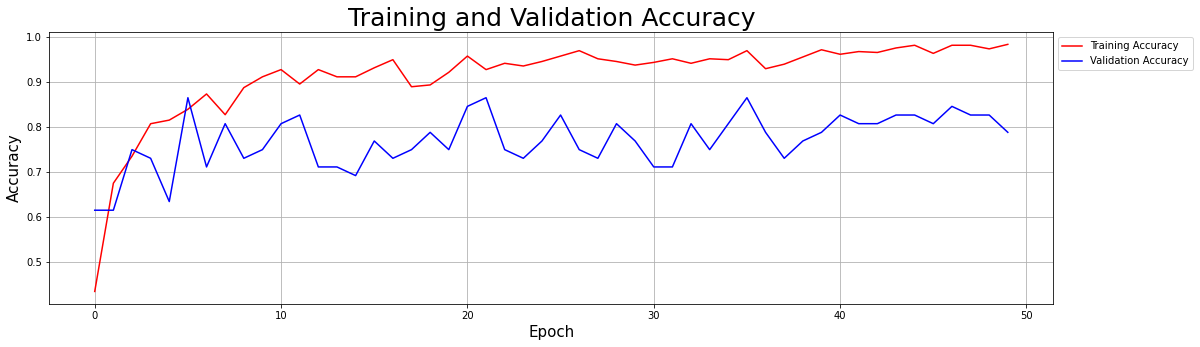

time: 209 ms (started: 2021-06-29 15:29:44 +00:00)


In [13]:
plot_accuracy(history)

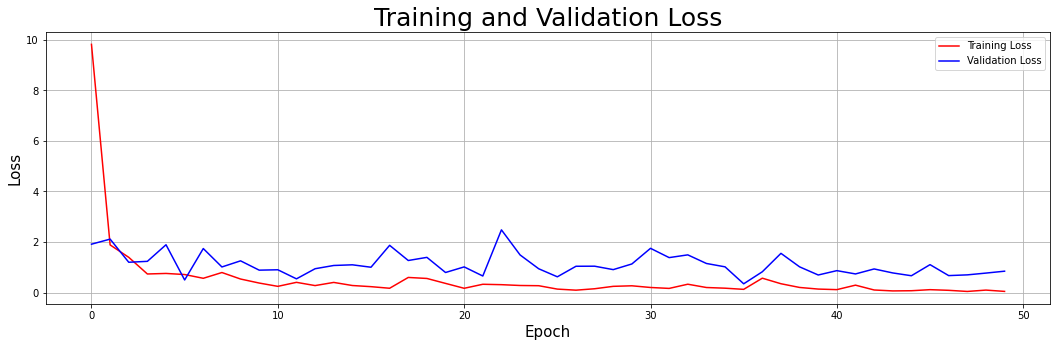

time: 170 ms (started: 2021-06-29 15:29:57 +00:00)


In [14]:
plot_loss(history)